## Elements of Data Science Final Project
### Instructor: Nazlı İkizler Cinbiş
### Contributors: Can Ali Ateş & Mehmet Berat Ersarı


# Game Presentation

**What is League of Legends?**

Developed by Riot Studios, League of Legends, or "LoL", is an online multiplayer video-game that is available to Windows/MacOS users. LoL consists 2 teams ('Blue & 'Red') facing each other. Also, it is a 5 vs 5 character based MOBA game which released in 2009. Goal of the game is destroy basement of enemy team and win the game. League of Legends is too much popular in game industry. It has a lot of tournament with high prizes whole world.


**Team Roles**

*JUNGLER*:  Mentality of this players, hunt for life. Mostly kills jungle minions and global objectives (Dragon, Baron etc.) and help the other lanes.

*TOP LANER*: The resistant and alone warriors. Only focus the most powerful enemy characters.

*MID LANER*: Determine the game’s fate. Mostly plays assassin or magic characters.

*ATTACK DAMAGE CARRY*: They must be protected like a delicate baby before they have enough gold and experience to lead their team to victory.

*SUPPORT*: Protector of the team. Real goals are protect ADC from enemies.
<br>
<br>
<br>

# Data Presentation

Our data consists of numerical variables. So we didn't do any converting like string to int. Data has 40 columns. One of them is gameId. This is primary column. We dropped that. One of them is blueWins. That shows whether blue wins the match. Other columns represents some statistics of blue and red teams. 19 columns of them are about blue team. Other 19 columns are about red team.

**Common Columns** <br>
gameId : Unique game id for each game. <br>
blueWins : If blue team win the game 1, else 0. <br>

**Blue Team**


blueWardsPlaced: Count of placed ward by blue team.

blueWardsDestroyed: Count of destroyed ward by blue team.

blueFirstBlood: If blue team take first blood 1, else 0.

blueKills: Total kill of enemies by blue team.

blueDeaths: Total death of blue team.

blueAssists: Total assists of blue team.

blueEliteMonsters: Total killed Elite Monsters by blue team.

blue Dragons: Total killed Dragons by blue team.

blueHeralds: Total pre-baron killed by blue teams.

blueTowersDestroyed: Total destroyed turret count by blue team.

blueTotalGold: Total earned gold by blue team.

blueAvgLevel: Average level of blue team.

blueTotalExperience: Total earned exp by blue team.

blueTotalMinionsKilled: Total killed minions by blue team.

blueTotalJungleMinionsKilled: Total killed jungle minions by blue team.

blueGoldDiff: Gold difference of blue team from red team.

blueExperinceDiff: Exp difference of blue team from red team

blueCSPerMin: Average killed minions by blue team each minute.

blueGoldPerMin: Average earned gold per minute by blue team.


**Red Team**


redWardsPlaced: Count of placed wards by red team.

redWardsDestroyed:  Count of destroyed wards by red team.

redFirstBlood: If red team takes first blood 1, else 0.

redKills: Total kills of enemies by red team.

redDeaths: Total deaths of red team.

redAssists: Total assists of red team.

redEliteMonsters: Total killed elite monster by red team.

redDragons: Total killed dragon by red team.

redHeralds: Total killed pre-baron by red team.

redTowersDestroyed: Destroyed turret count by red team.

redTotalGold: Earned total gold by red team.

redAvgLevel: Average level ol red team.

redTotalExperience: Total earned experience by red team.

redTotalMinionsKilled: Killed total minion count by red team.

redTotalJungleMinionsKilled: Killed total jungle minion count by red team.

redGoldDiff: Gold difference of red team from blue team.

redExperienceDiff: Experince difference of red team from blue team.

redCSPerMin: Average minion kill count each minute by red team.

redGoldPerMin: Average earned gold each minute by red team.
<br>
<br>
<br>

# IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score , classification_report,  confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay


import warnings
warnings.filterwarnings("ignore")

# DATA COLLECTION

In [ ]:
# Read the data file as DataFrame object.
url = 'https://drive.google.com/file/d/1K9paKv7KU801RRoAR2rcu7VHvUDCPiqM/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data = pd.read_csv(path)

# Print the shape of the DataFrame.
print('Shape of the DataFrame:', data.shape)

# Print the first 5 tuples of the DataFrame.
data.head()

Shape of the DataFrame: (9879, 40)


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


According to Data Set shape, we have 9879 row and 40 columns. <br>
<br>
<br>
<br>


# DATA PREPROCESSING AND CLEANING

In [ ]:
# Check data for information of columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

**IMPORTANT NOTES ABOUT DATA INFO** <br>
<br>
According to DataFrame information, all columns has 9879 value so we can say "We have 0 values in Data Set." <br>
<br>
According to DataFrame information, all columns are numerical so we can say "There has no object column." <br>
<br>
As a result of 0 null value, we don't need to handling missing data. <br>
<br>
As a result of numerical columns, we don't need to do encoding categorical columns. <br>
<br>
blueExperienceDiff = blueTotalExperience - redTotalExperience <br>
<br>
blueGoldDiff = blueTotalGold - redTotalGold. <br>
<br>
This means blueTotalExperience, blueTotalGold, redTotalExperience, redTotalGold are redundant columns. Also we can take diff of all atributes such as blueKillDiff, blueAssistsDiff. And drop all redundant columns. We will do this next.<br>
<br>
<br>
<br>

In [ ]:
# First of all we should delete "gameId" column. Because it has too much unique value and unnecessary.
data = data.drop('gameId', axis = 1)

# Display first 5 tuples of the updated DataFrame.
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


**We dropped gameId column.** <br>
<br>
When we investigate the Data Set, "gameId" column has a unnecessary unique value in each row. <br>
<br>
These unique values will not affect our problem, so we can drop it for column reduction. <br>
<br>
<br>
<br>

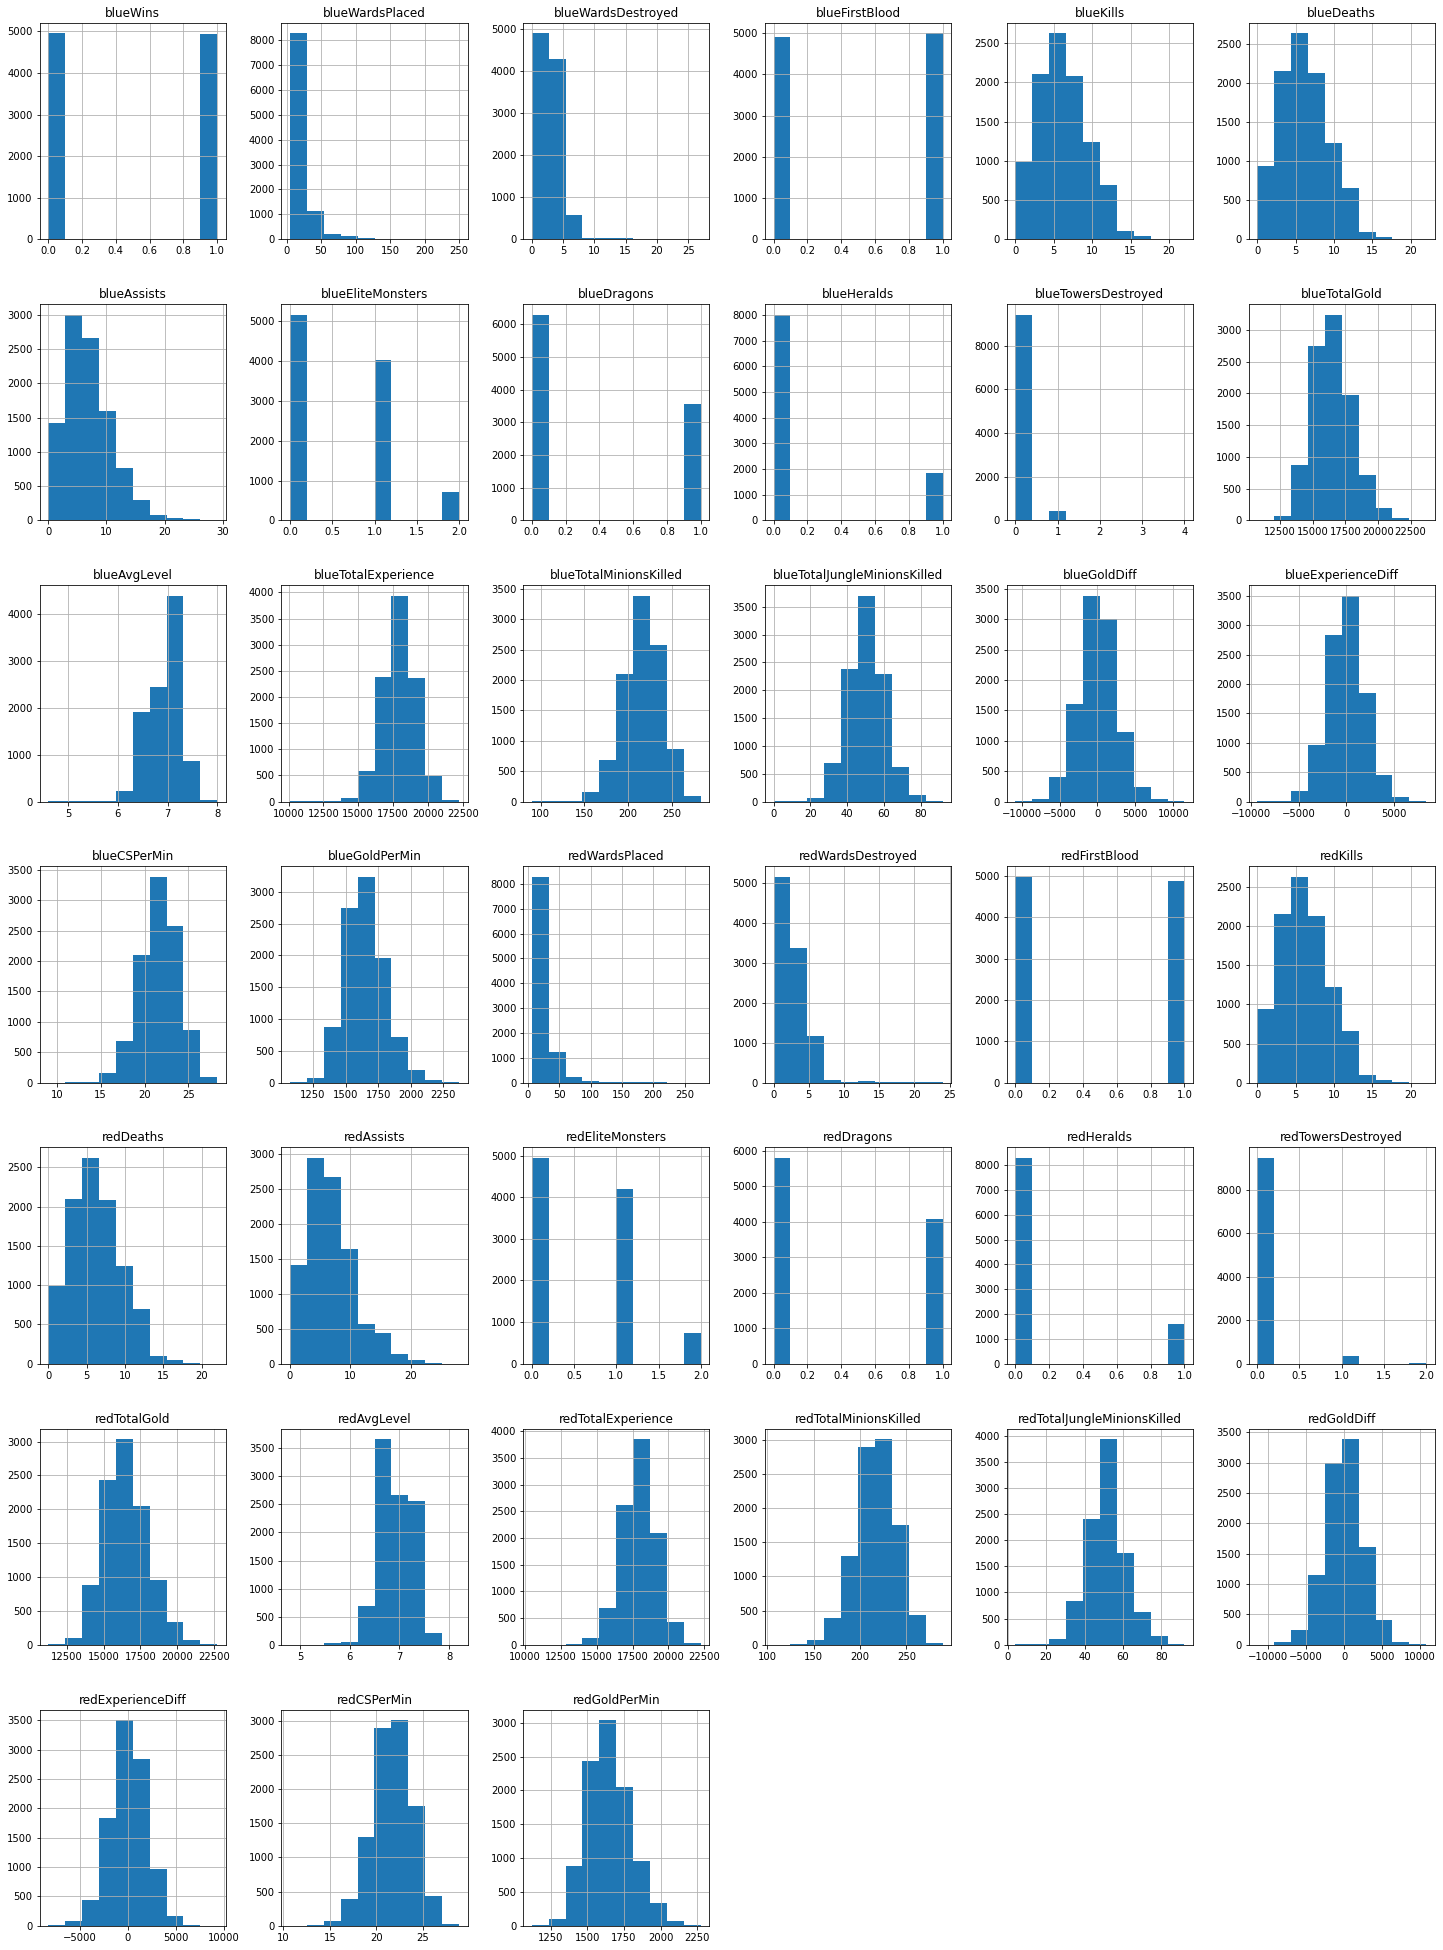

In [ ]:
# Create histograms for visualize the distribution of the data.
histogram = data.hist(figsize = (25, 35))

**VERY IMPORTANT COMMENTS ABOUT HISTOGRAM CHARTS** <br>
1.blueWins column, this column is we want to create a model to predict this. If this is 1 that means blue team won the game. if this value is 0, red team won the game.<br>
<br>
**There are five non-continues variables for each team.**<br>
*1.FirstBlood*<br>

This value indicates which team made the first elimination. The blue team is set to 1 when they get first blood. In fact, these graphs are similar to each other, since if one team gets the first blood, the other will not have such a chance. The total number of 0 values for red is equal to the total number of 1 values for blue.<br>
    
*2.EliteMonsters*<br>

This value shows how many eliteMonsters the team killed in the first 10 minutes. If we look at the number of killed ElitMonster, it was generally either not killed at all or only 1 killed in the first 10 minutes. The rate of being killed twice is very low.

*3.Dragons*<br>

This value indicates whether the red and blue team has killed the dragon in the first 10 minutes. If we look at the distribution of the data, the rate of not killing the dragon for both teams in the first 10 minutes is less.<br>

*4.Heralds*<br>

Heralds is a pre-baron in the league of legends. When the herald destroyed it give the soul then you can use this soul for call the herald. This value indicates whether the red and blue team has killed the herald in the first 10 minutes. If we look at the distribution of the data, the rate of not killing the herald for both teams in the first 10 minutes is less.<br>

*5.TowersDestroyed*<br>

This value shows how many towers of the team was destroyed in the first 10 minutes. If we look at the distribution, we can say that the probability of not destroyed in the first 10 minutes is higher.<br>
<br>
**There are thirteen continues variables for each team.** <br>

*1.WardsPlaced*<br>

Ward provides vision in dark sides of the map. There are two types of ward. Default and red ward. Red ward stays long when enemy destroy it, default one has limited time. <br>

*2.Kills*<br>

This value shows how many kills the team made in the first 10 minutes. If we look at the graph, it is mostly distributed between 3 and 10 kills.<br>

*3.Deaths*<br>

This value shows how many times the team died in the first 10 minutes. If we look at the graph, it is mostly distributed between 3 and 10 deaths. It is very similar to the graph of the number of kills.<br>

*4.Assists*<br>

First, I will explain what is assit? An assist is the action of helping an allied champion kill an enemy champion. Assists can be scored by hitting the enemy within the last 10 seconds before their death. This value shows how many assists the team members made in the first 10 minutes in total. If we look at the graph, it is mostly distributed between 0 and 11 kills<br>

*5.TotalGold*<br>

This value shows how many gold the team won in the first 10 minutes. If we look at the graph, the majority is distributed between 14 thousand and 18 thousand.<br>

*6.AvgLevel*<br>


This value shows the average level of the team members in the 10th minute. If we look at the graph, the majority is distributed between 6.2 and 7.6.<br>

*7.TotalExperience*<br>

This value shows how much experience team members have gained in the first 10 minutes. If we look at the graph, the majority is distributed between 16 thousand and 18 thousand.<br>

*8.TotalMinionsKilled*<br>

This value shows how many minions were killed in the first 10 minutes by the team. If we look at the graph, the majority is distributed between 185 and 235.<br>

*9.TotalJungleMinionsKilled*<br>

This value shows how many jungle minions were killed in the first 10 minutes by the team. If we look at the graph, the majority is distributed between 38 and 63.<br>

*10.GoldDiff*<br>

This value shows how much gold difference there is between the teams in 10 th minute.

*11.ExperienceDiff*<br>

This value shows how much experience difference there is between the teams in 10 th minute.

*12.CSPerMin*<br>

This value shows how much minions are destroyed each minute. <br>

*13.GoldPerMin*<br>

This value shows how many gold the team earned per minute. This value is the total number of gold earned divided by 10. If we look at the graph, the majority is distributed between 1300 and 1800 <br>
<br>
<br>
<br>

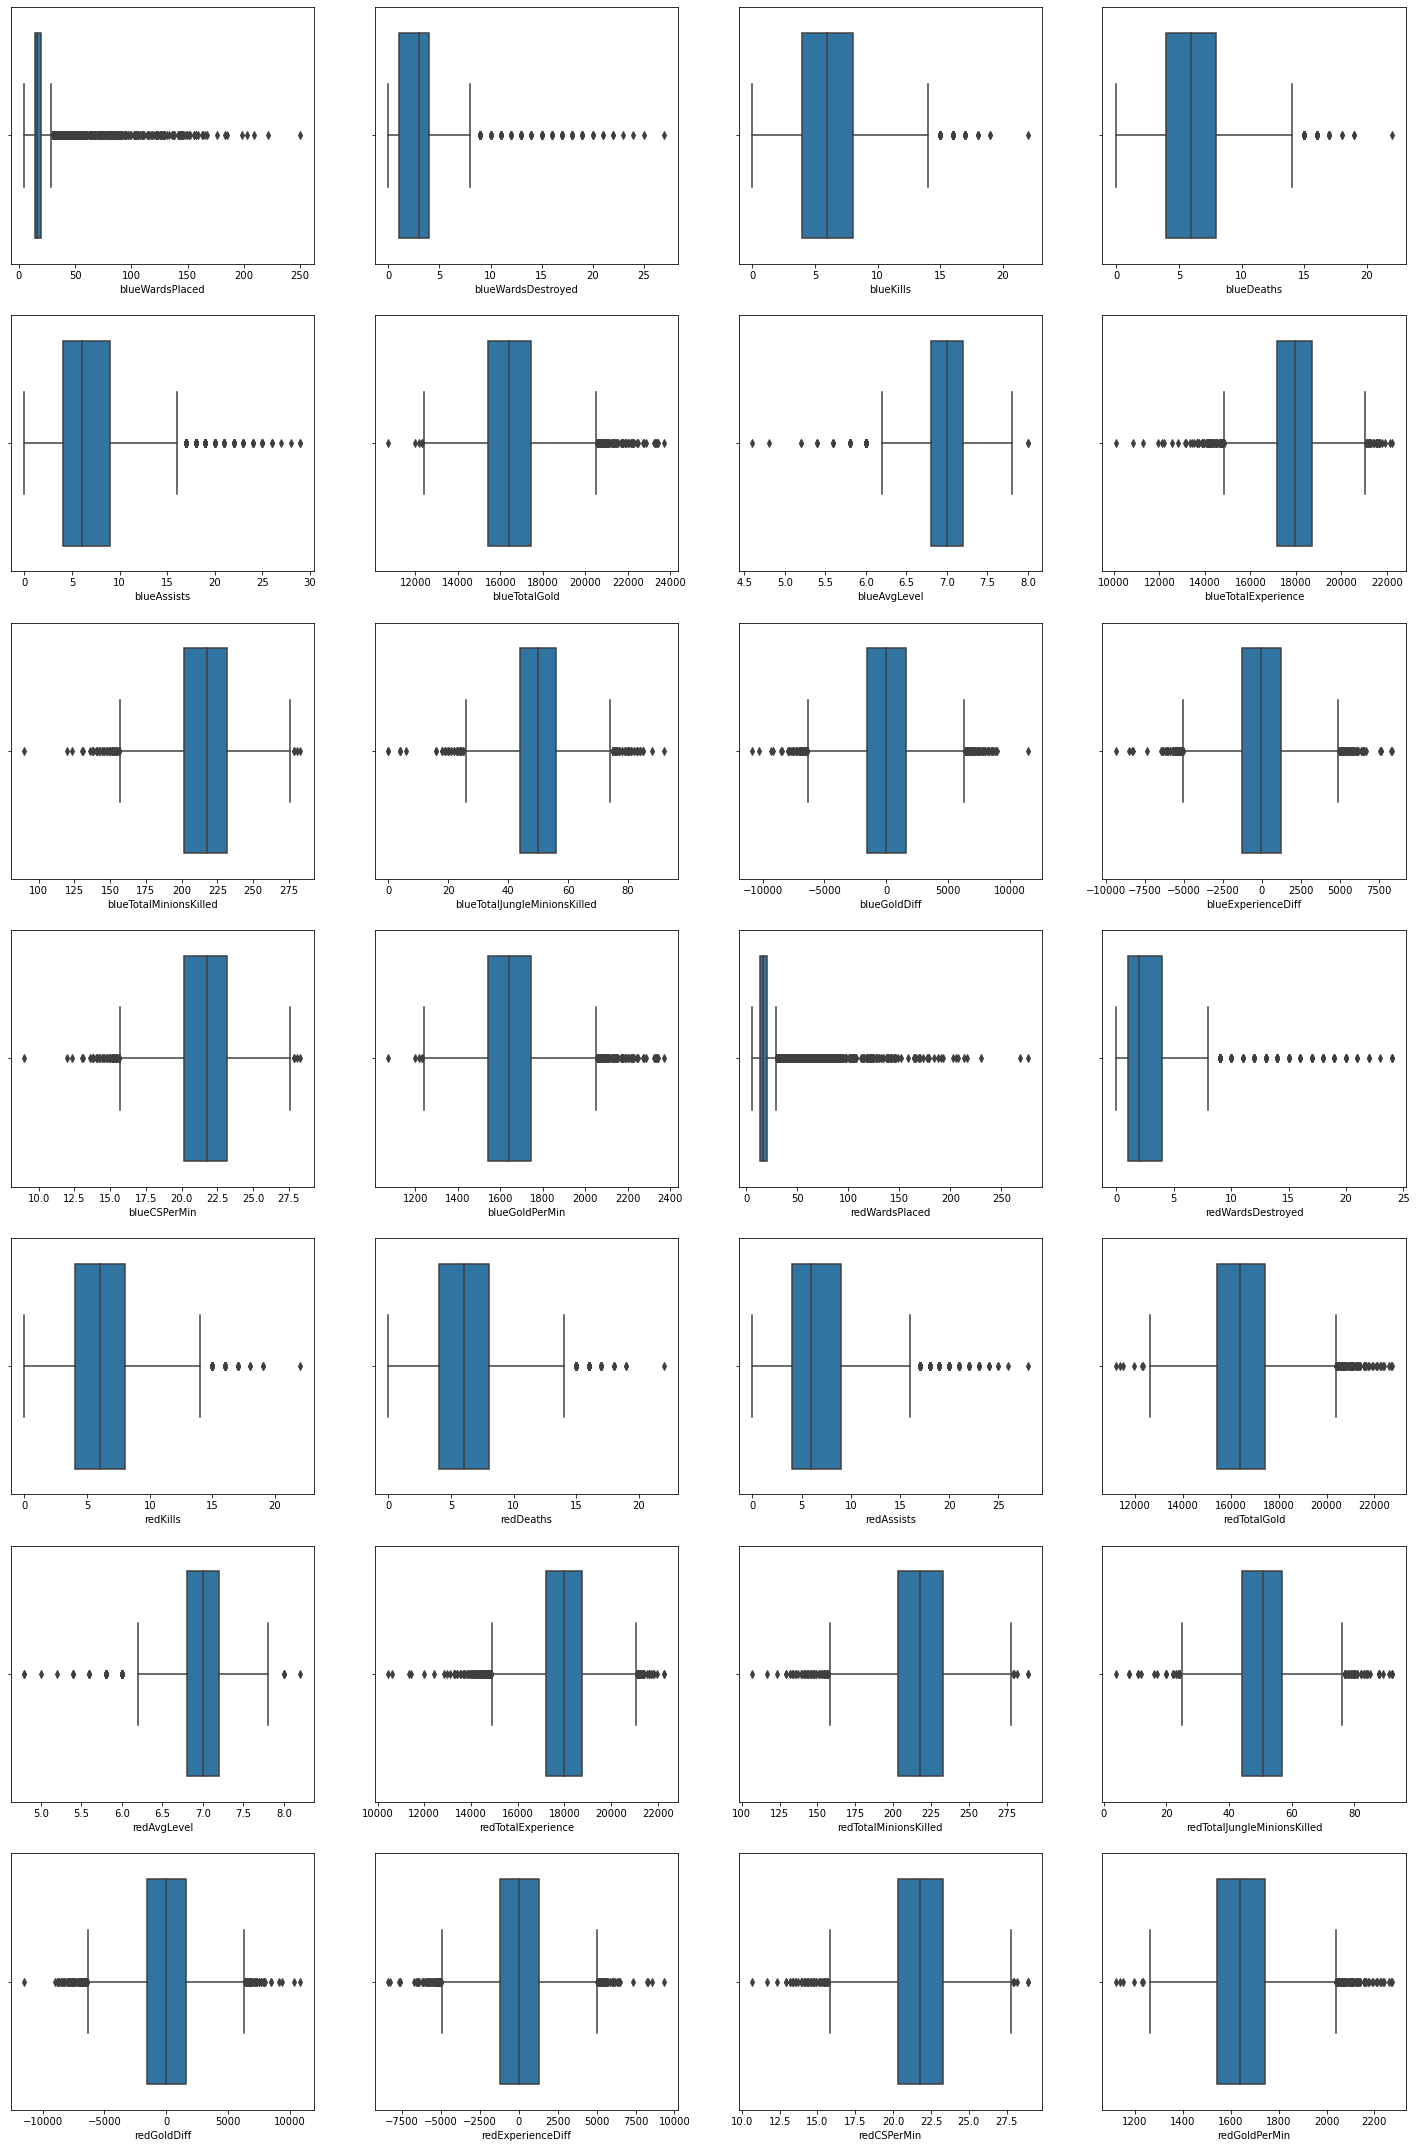

In [ ]:
# Create figure for plot boxplots
f = plt.figure(figsize = (25,50))

# Take columns which boxplot will visualize
boxplot_columns = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redDeaths', 'redAssists',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Print boxplot of each column.
for i, col in enumerate(boxplot_columns):
    ax = f.add_subplot(9,4,i+1)
    sns.boxplot(x = data[col])

**IMPORTANT COMMENTS ABOUT BOXPLOT CHARTS** <b>

We plot the all boxplot charts for continues variables to see distribution of outliers. And we noticed that some of the columns has a lot of outlier values such as blueWardsPlaced, redWardsPlaced, blueGoldPerMin, redGoldPerMin, blueTotalExperience, redTotalExperience. This values affects badly our model. So we decided to delete these values. We created a function to delete all. <br>
<br>
<br>
<br>

In [ ]:
# Create a function for delete the detected outliers.
def remove_outliers(df_in, column):
    # Use Statistics for detect outliers
    q1 = df_in[column].quantile(0.25)
    q3 = df_in[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    # Delete outliers, then return updated DataFrame.
    df_out = df_in.loc[(df_in[column] > lower_fence) & (df_in[column] < upper_fence)]
    return df_out

In [ ]:
# Take columns which can have outliers.
boxplot_columns = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redDeaths', 'redAssists',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Delete outliers.
for column in boxplot_columns:
    data = remove_outliers(data, column)

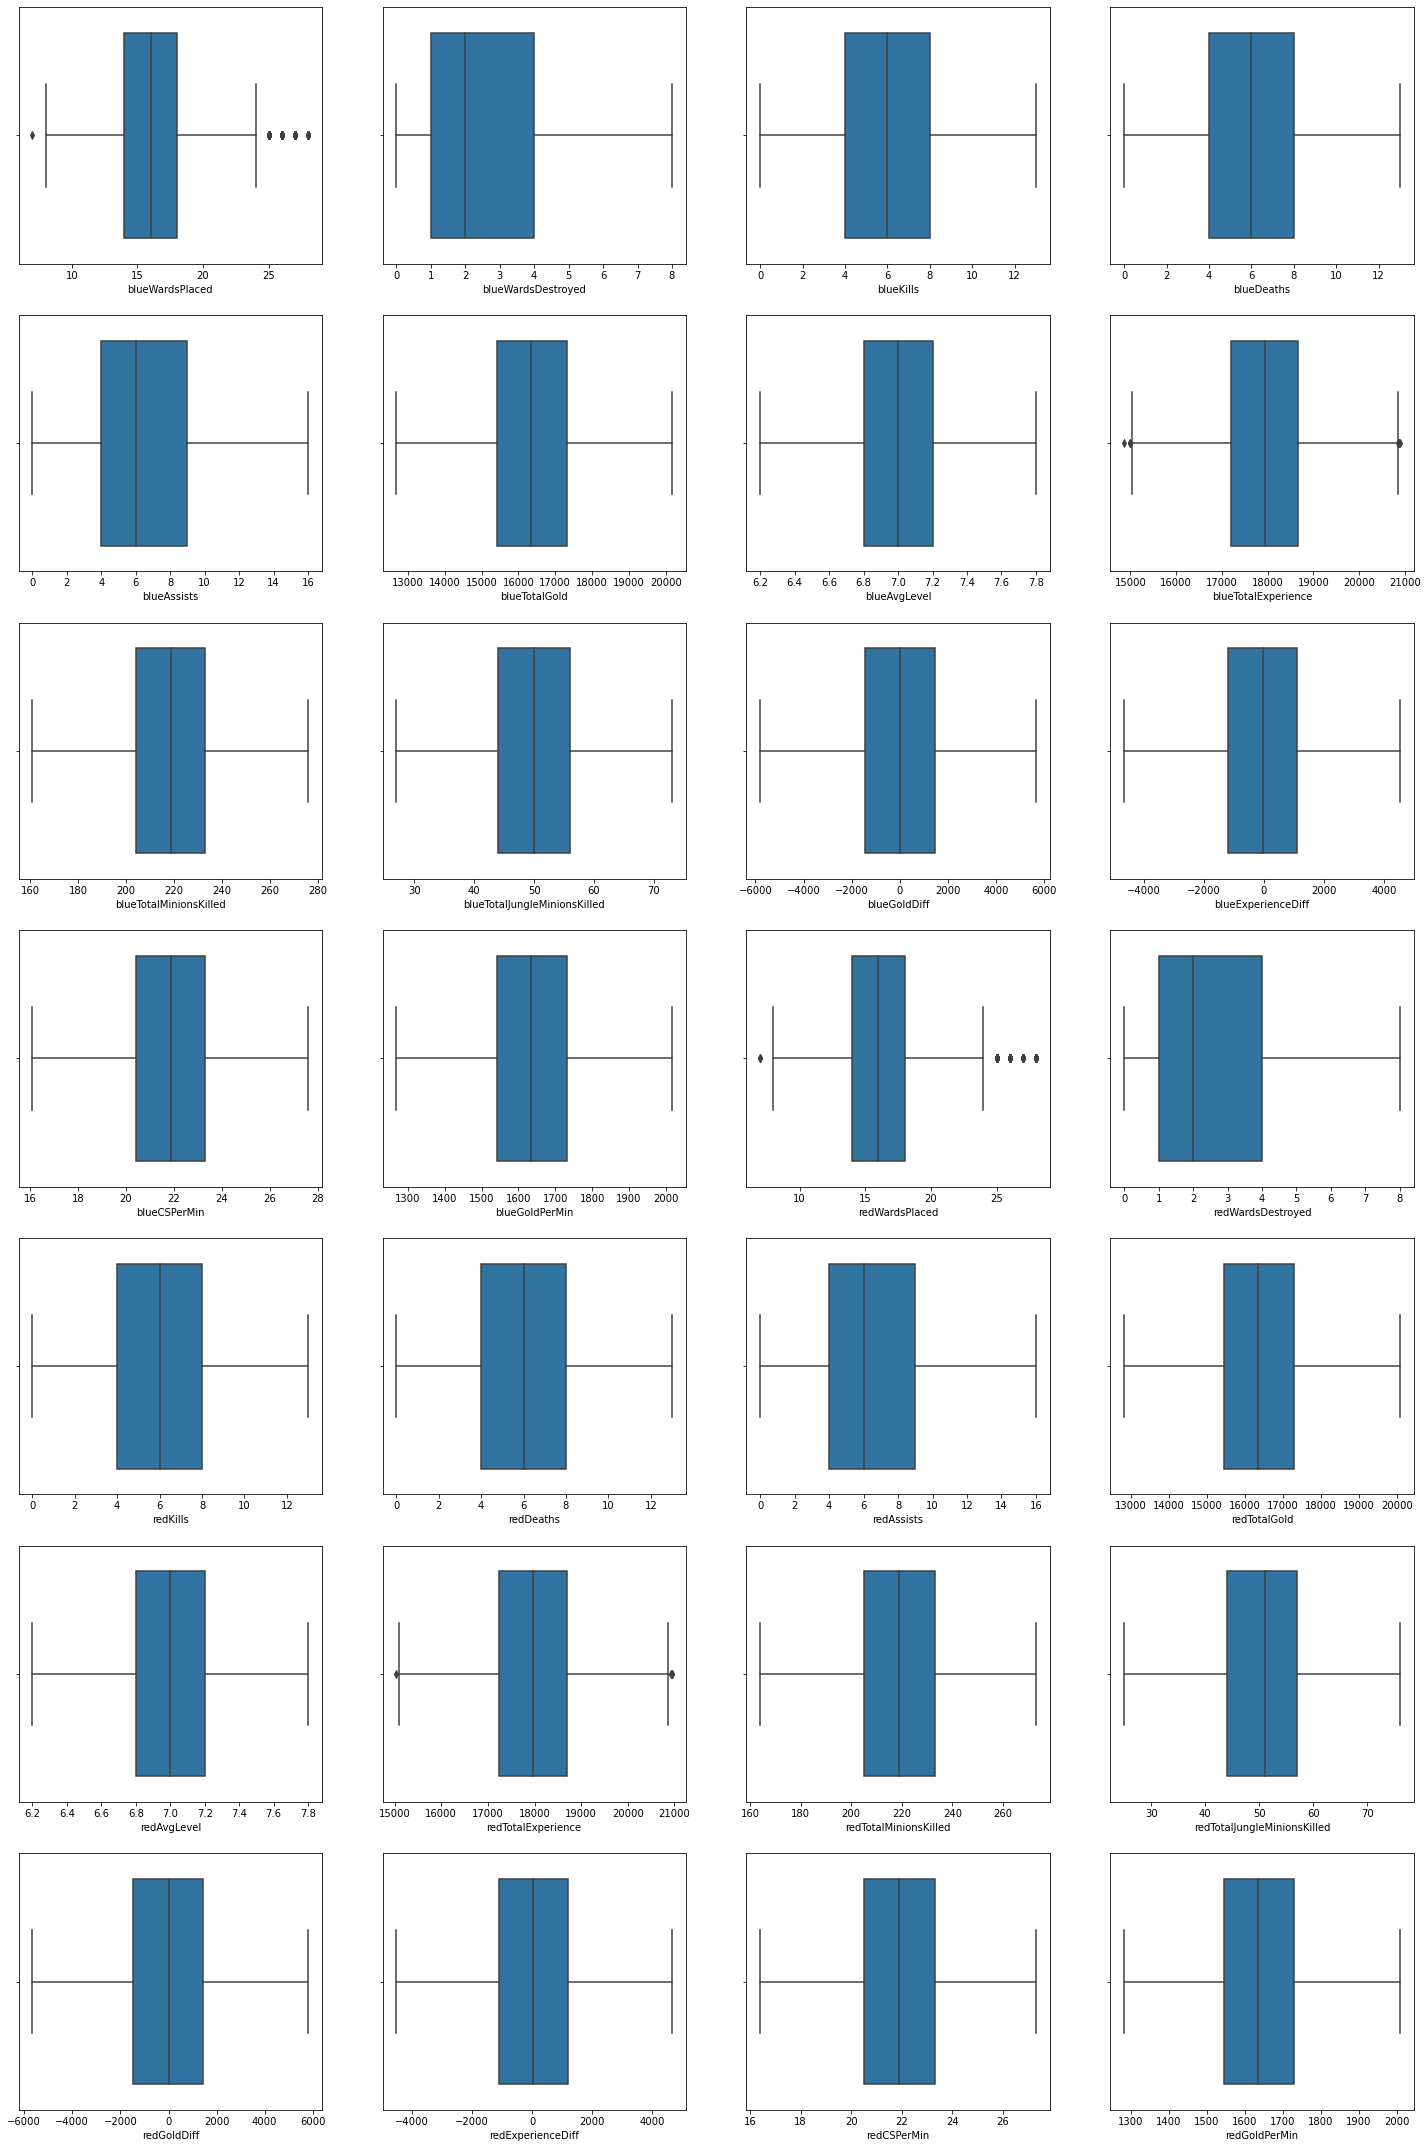

In [ ]:
# Create a figure for plot the boxplots
f = plt.figure(figsize = (25,50))

# Take columns which boxplot will visualize.
boxplot_columns = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redKills', 'redDeaths', 'redAssists',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']

# Print boxplots of each column.
for i, col in enumerate(boxplot_columns):
    ax = f.add_subplot(9,4,i+1)
    sns.boxplot(x = data[col])

**IMPORTANT COMMENTS ABOUT REMOVING OUTLIERS**

Our removing function worked very well. We can see that by looking at the charts above. <br>
<br>
<br>
<br>

In [ ]:
# We will do analysis on blue team, so we can extract useful features from exist features.
data.insert(1, 'bluePlacedWardDiff', data['blueWardsPlaced'] - data['redWardsPlaced'])
data.insert(2, 'blueDestroyedWardDiff', data['blueWardsDestroyed'] - data['redWardsDestroyed'])
data.insert(7, 'blueKillDiff', data['blueKills'] - data['redKills'])
data.insert(8, 'blueDeathDiff', data['blueDeaths'] - data['redDeaths'])
data.insert(9, 'blueAssistsDiff', data['blueAssists'] - data['redAssists'])
data.insert(10, 'blueEliteMonsterDiff', data['blueEliteMonsters'] - data['redEliteMonsters'])
data.insert(11, 'blueDragonDiff', data['blueDragons'] - data['redDragons'])
data.insert(12, 'blueHeraldDiff', data['blueHeralds'] - data['redHeralds'])
data.insert(13, 'blueDestroyedTowerDiff', data['blueTowersDestroyed'] - data['redTowersDestroyed'])
data.insert(14, 'blueAvgLevelDiff', data['blueAvgLevel'] - data['redAvgLevel'])
data.insert(15, 'blueMinionsDiff', data['blueTotalMinionsKilled'] - data['redTotalMinionsKilled'])
data.insert(16, 'blueJungleMinionDiff', data['blueTotalJungleMinionsKilled'] - data['redTotalJungleMinionsKilled'])
data.insert(17, 'blueCSPerMinDiff', data['blueCSPerMin'] - data['redCSPerMin'])
data.insert(18, 'blueGoldPerMinDiff', data['blueGoldPerMin'] - data['redGoldPerMin'])

# Drop unnecessary columns.
drop_columns = ['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed',
               'redWardsDestroyed', 'redFirstBlood', 'blueKills', 'redKills', 'blueDeaths',
               'redDeaths', 'blueAssists', 'redAssists', 'blueEliteMonsters', 'redEliteMonsters',
               'blueDragons', 'redDragons', 'blueHeralds', 'redHeralds',"blueTotalGold","blueTotalExperience", 'blueTowersDestroyed', 
               'redTowersDestroyed', 'blueAvgLevel', 'redAvgLevel', 'redTotalGold', 'redTotalExperience',
               'blueTotalMinionsKilled', 'redTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
               'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'blueCSPerMin',
               'redCSPerMin', 'blueGoldPerMin', 'redGoldPerMin']

data = data.drop(drop_columns, axis = 1)

# Display the updated DataFrame.
data.head()

,blueWins,bluePlacedWardDiff,blueDestroyedWardDiff,blueFirstBlood,blueKillDiff,blueDeathDiff,blueAssistsDiff,blueEliteMonsterDiff,blueDragonDiff,blueHeraldDiff,blueDestroyedTowerDiff,blueAvgLevelDiff,blueMinionsDiff,blueJungleMinionDiff,blueCSPerMinDiff,blueGoldPerMinDiff,blueGoldDiff,blueExperienceDiff
0,0,13,-4,1,3,-3,3,0,0,0,0,-0.2,-2,-19,-0.2,64.3,643,-8
1,0,0,0,0,0,0,3,-2,-1,-1,-1,-0.2,-66,-9,-6.6,-290.8,-2908,-1173
2,0,0,-3,0,-4,4,-10,1,1,0,0,-0.4,-17,18,-1.7,-117.2,-1172,-1033
8,0,1,1,0,0,0,3,-2,-1,-1,0,0.0,-51,8,-5.1,-197.9,-1979,-771
9,1,-3,-1,1,-1,1,1,1,1,0,0,0.0,-27,-4,-2.7,-154.8,-1548,-1574


**IMPORTANT NOTES ABOUT REMOVING REDUNDANT COLUMNS**

We take difference of each columns as we said first and dropped the redudant columns. For example: <br> bluePlacedWardDiff = blueWardsPlaced - redWardsPlaced. <br> 
blueKillDiff = blueKills - redKills. <br>
<br>
We did this to get rid of unnecessary columns and speed up our model. <br>
<br>
<br>
<br>

# DATA EXPLORATION AND ANALYSIS

In [ ]:
# Critical Statistics about data
data.describe()

,blueWins,bluePlacedWardDiff,blueDestroyedWardDiff,blueFirstBlood,blueKillDiff,blueDeathDiff,blueAssistsDiff,blueEliteMonsterDiff,blueDragonDiff,blueHeraldDiff,blueDestroyedTowerDiff,blueAvgLevelDiff,blueMinionsDiff,blueJungleMinionDiff,blueCSPerMinDiff,blueGoldPerMinDiff,blueGoldDiff,blueExperienceDiff
count,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000,5855.000000
mean,0.506234,0.014347,0.080444,0.506917,0.055337,-0.055337,-0.014005,-0.030743,-0.055508,0.024765,0.003757,-0.009974,-0.785995,-0.805978,-0.078599,1.012519,10.125192,-36.637575
std,0.500004,4.201591,2.052235,0.499995,3.683036,3.683036,5.067007,1.065057,0.880739,0.588787,0.265264,0.417285,28.565991,12.960701,2.856599,210.700023,2107.000225,1654.651186
min,0.000000,-17.000000,-7.000000,0.000000,-11.000000,-11.000000,-16.000000,-2.000000,-1.000000,-1.000000,-2.000000,-1.200000,-101.000000,-45.000000,-10.100000,-580.000000,-5800.000000,-4650.000000
25%,0.000000,-3.000000,-1.000000,0.000000,-2.000000,-3.000000,-3.000000,-1.000000,-1.000000,0.000000,0.000000,-0.200000,-20.000000,-9.500000,-2.000000,-144.550000,-1445.500000,-1195.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.100000,-0.600000,-6.000000,-26.000000
75%,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.200000,19.000000,8.000000,1.900000,147.100000,1471.000000,1108.500000
max,1.000000,17.000000,7.000000,1.000000,11.000000,11.000000,16.000000,2.000000,1.000000,1.000000,2.000000,1.200000,96.000000,43.000000,9.600000,565.600000,5656.000000,4520.000000


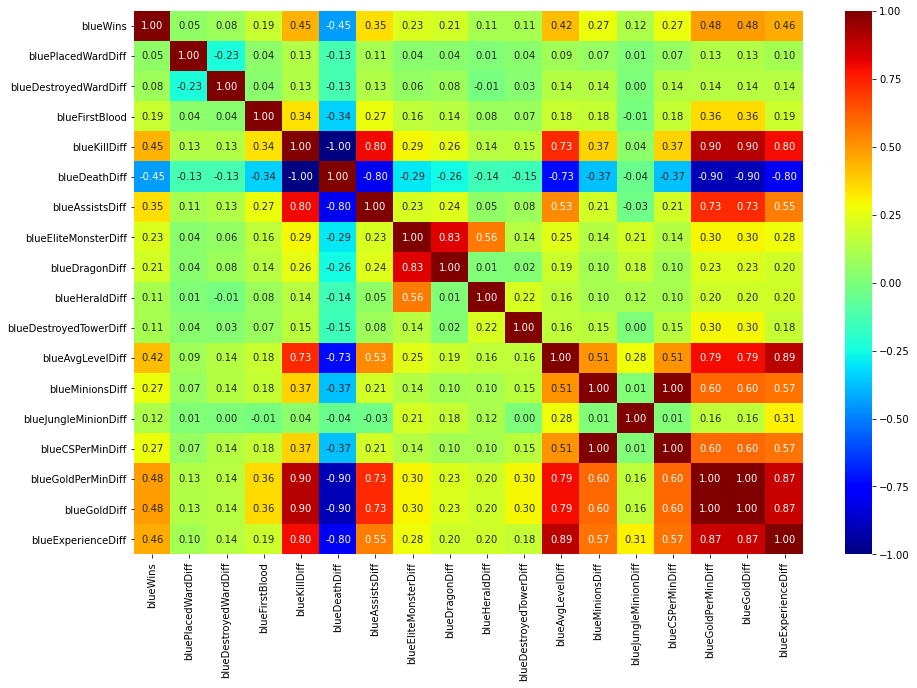

In [ ]:
# First of all we create correlation heatmap for determine the relationships between features.
plt.figure(figsize = (15,10))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='jet', fmt = '.2f')

**IMPORTANT COMMENTS ABOUT HEATMAP**<br>
We can consider a |correlation coefficient| > 0.45 as representative of a high correlation. Now, we will explain which has high correlation in details.<br>

First we can see that blueGoldPerMinDiff/blueGold and blueCSPerMinDiff/blueMinionsDiff 1.00. So that we will drop also blueGoldPerMinDiff and blueCSPerMinDiff. We won't comment about these values.<br>

Also we can see that blueKillDiff/blueDeathDiff=-1.00. That means completely negative correlated. So that we will drop the blueDeathDiff column. We won't comment about these values. <br>
<br>
<br>
<br>


In [ ]:
# Droping the other redundant columns which we mentioned above
drop_columns = ["blueGoldPerMinDiff","blueCSPerMinDiff","blueDeathDiff"]

data = data.drop(drop_columns, axis = 1)

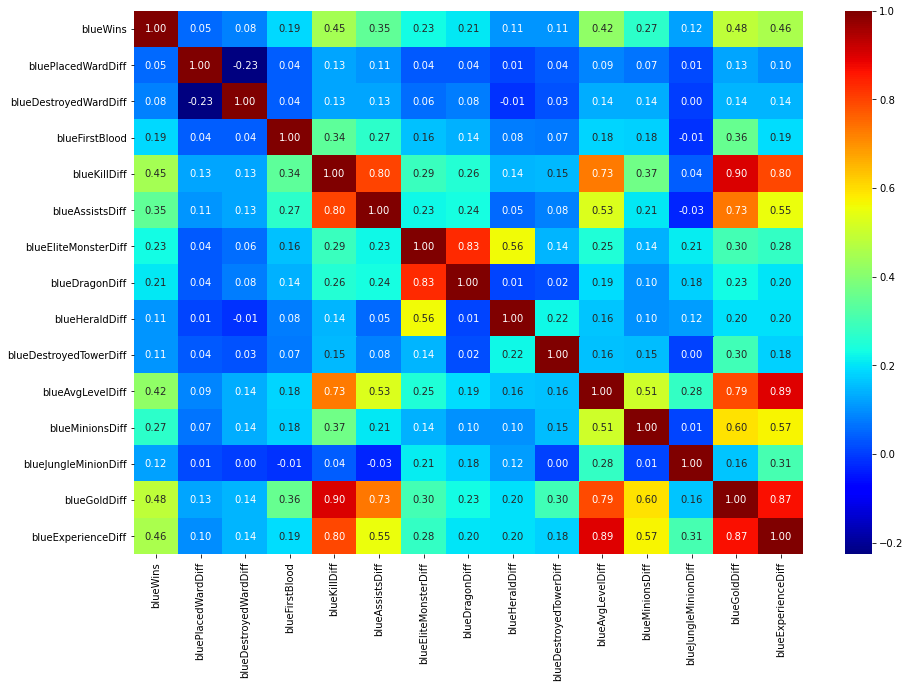

In [ ]:
# Heatmap after the removing other redudant columns
plt.figure(figsize = (15,10))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='jet', fmt = '.2f')

**IMPORTANT COMMENTS ABOUT HEATMAP**<br>
<br>

We can consider a correlation coefficient > 0.45 as representative of a high correlation. Now, we will explain which has high correlation in details.<br>
<br>

**According to blueWins**<br>

*blueKillDiff/blueWins*: That is high because taking too much kill is important to win the game.<br>

*blueGoldDiff/blueWins*: If blue team have more than gold read team. That means blue team members can buy more items to get stronger. This significantly affects winning. <br>

*blueExperienceDiff/blueWins*: As your experience difference increases, you can make more powerful hits. That means your win chance is increasing.<br>
<br>
<br>

**According to blueKillDiff**
<br>
<br>

*blueAssistsDiff/blueKillDiff*: When a team take a kill, it can be due to roaming, ganking, or kill at the botlane. These may be leading to assists.<br>

*blueAvgLevelDiff/blueKillDiff*: Killing a champion, increase champion experience. Also, experience increases the level. So that Average Level increases.<br>

*blueGoldDiff/blueKillDiff*: Killing a champion gives too much gold. That is why there is a high correlation.<br>

*blueExperienceDiff/blueKillDiff*: Killing a champion gives experience to the champion. That is why there is a high correlation.<br>

<br>
<br>

**According to blueAssitsDiff** <br>
<br>
<br>
<br>
*blueExperienceDiff/blueAssitsDiff*: When you make an assists you gain experience and your experience increases. That is why there is a high correlation.<br>

*blueAvgLevelDiff/blueAssitsDiff*: When you make an assists you gain experience and your experience increases. Also, experience increases the level. So that Average Level increases.<br>

*blueGoldDiff/blueAssitsDiff*: Making an assists gives gold. That is why there is a high correlation.<br>

<br>
<br>

**According to blueEliteMonstersDiff** <br>
<br>
<br>

*blueDragonDiff/blueEliteMonstersDiff*: Dragon are considered as an Elite Monster in the dataset.<br>

*blueHeraldDiff/blueEliteMonstersDiff*: blueDragonDiff + blueHeraldDiff = blueEliteMonstersDiff, so that there is a high correleation between these.<br>
<br>
<br>
**According to blueAvgLevelDiff**<br>
<br>
<br>

*blueMinionsDiff/blueAvgLevelDiff*: Killing minions gives experience, therefore gives level<br>

*blueGoldDiff/blueAvgLevelDiff*: The more gold you have, the more you killed minions or champions, and so the more experience you'll get<br>

*blueExperienceDiff/blueAvgLevelDiff*: The higher the average level of the team, the likelier it is that blue Team leads the game in term of exp<br>
<br>
<br>
**According to blueMinionsDiff**<br>
<br>
<br>

*blueGoldDiff/blueMinionsDiff*: If you kill more minion, you probably have more gold. That is why there is a correlation.<br>

*blueExperienceDiff/blueMinionsDiff*: If you kill more minion, you probably have more experience. That is why there is a correlation.<br>
<br>
<br>
**According to blueGoldDiff**<br>
<br>
<br>

*blueExperienceDiff/blueGoldDiff*: If you have more gold, you probably have more experience. Because gold and experience are often earned in the same way.<br>

<br>
<br>
<br>


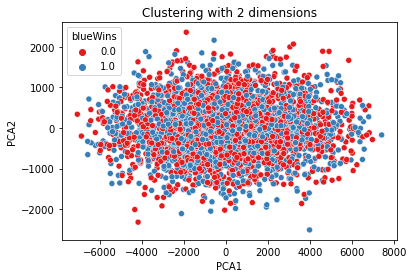

In [ ]:
# Cluster Analysis.
reduced_data = PCA(n_components = 2).fit_transform(data)
results = pd.DataFrame(reduced_data, columns = ['PCA1', 'PCA2'])
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = data['blueWins'], data = results, palette = 'Set1')
plt.title('Clustering with 2 dimensions')
plt.show()

**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
The clustering is not suitable for this data set because even the original values is not clustered well. <br>
<br>
<br>
<br>

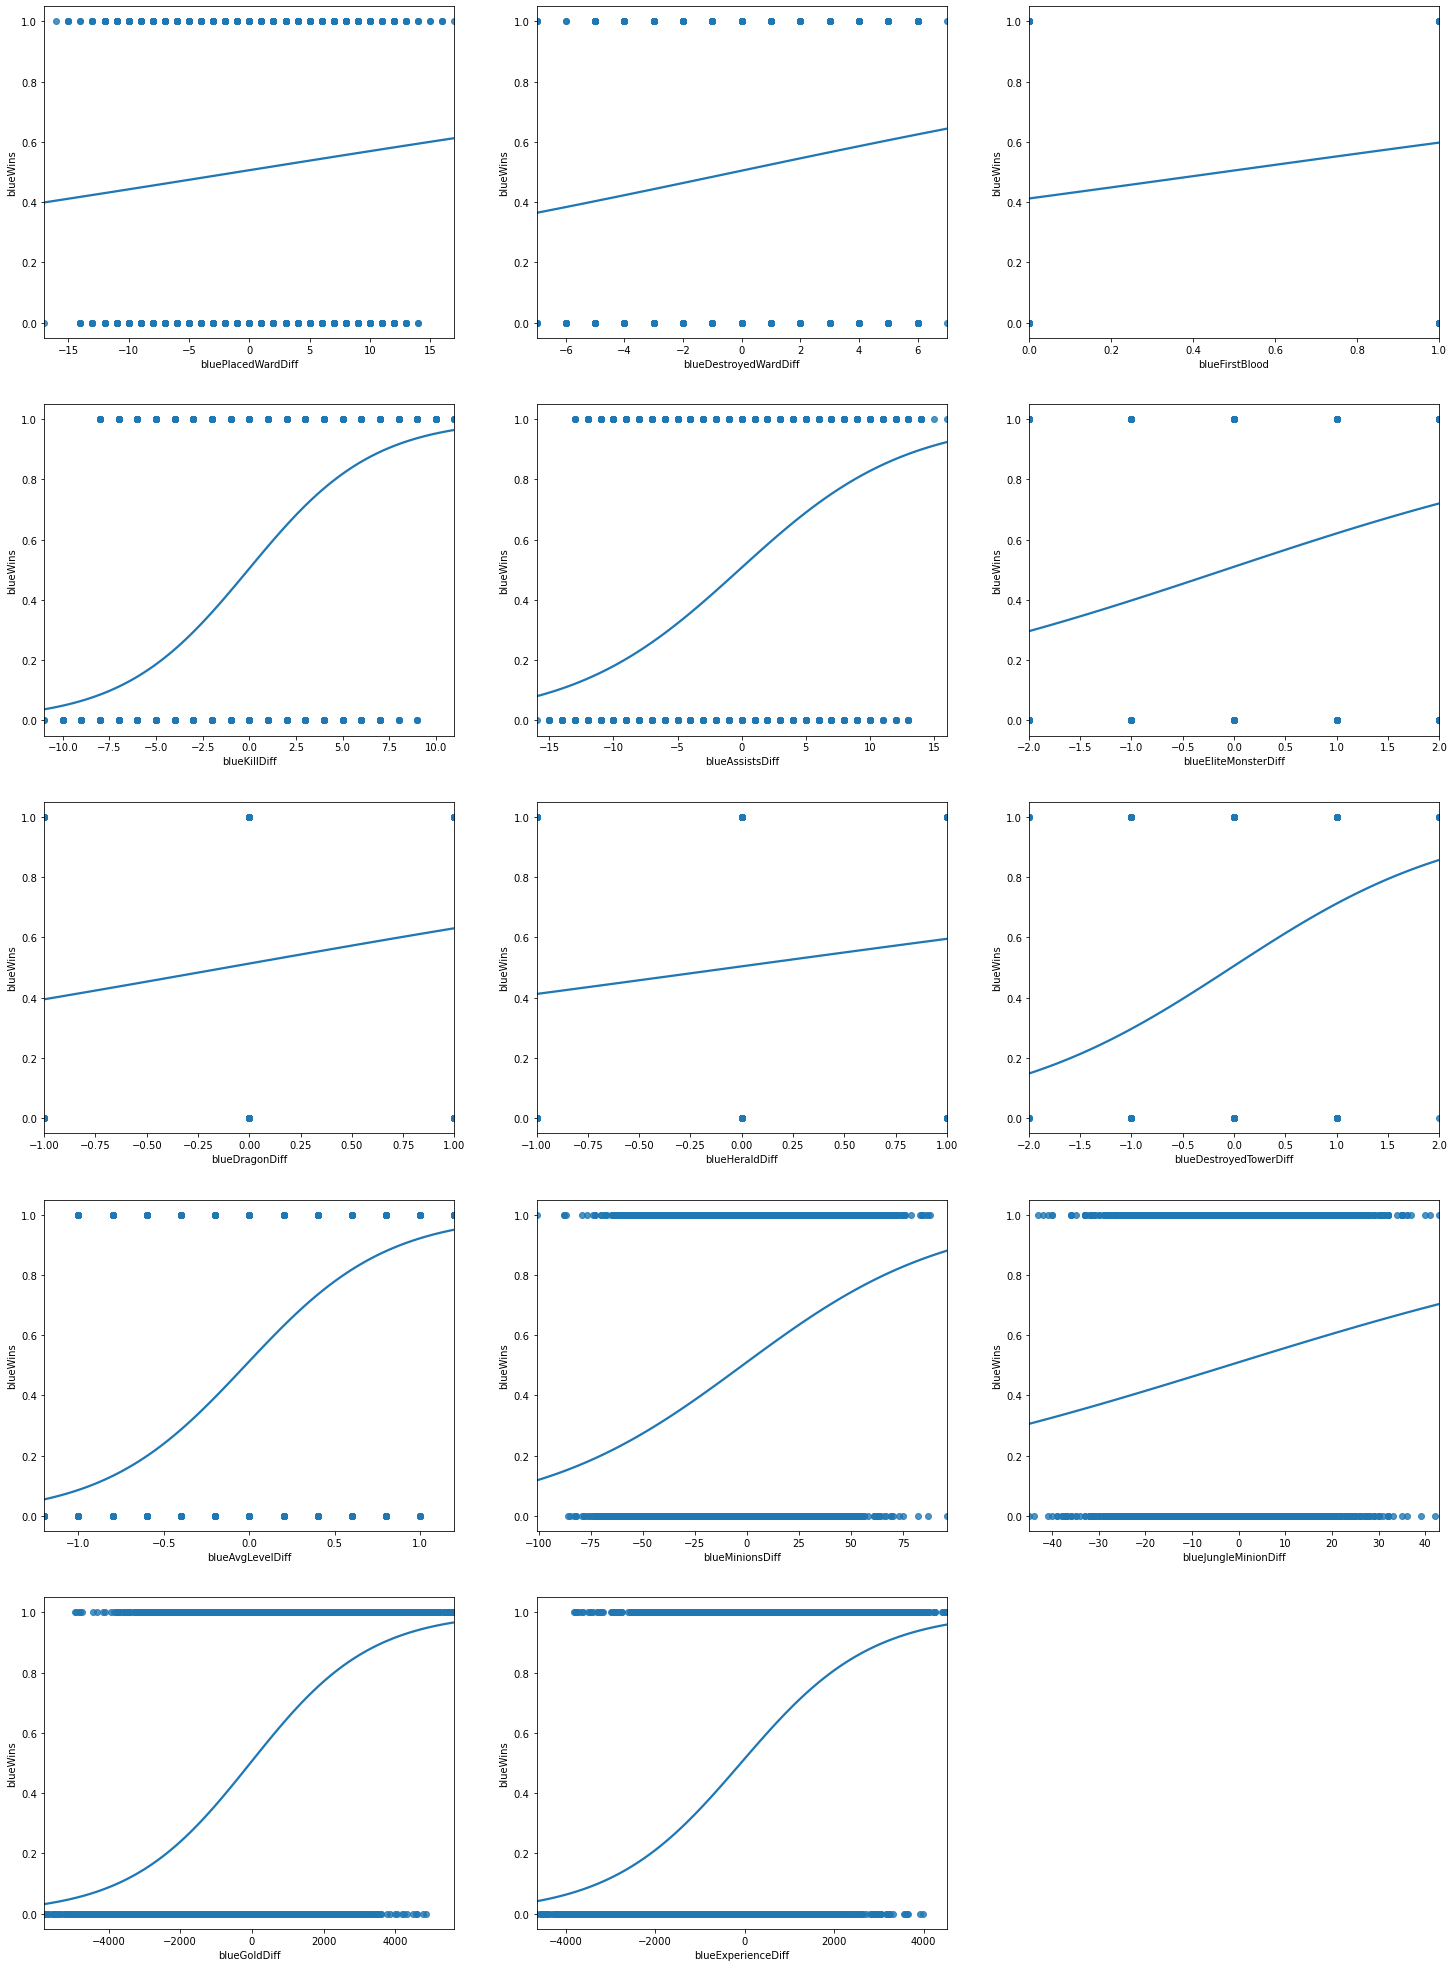

In [ ]:
# Create a figure for plot the boxplots
f = plt.figure(figsize = (25, 50))

function_columns = ['bluePlacedWardDiff', 'blueDestroyedWardDiff',
                   'blueFirstBlood', 'blueKillDiff',  'blueAssistsDiff',
                   'blueEliteMonsterDiff', 'blueDragonDiff', 'blueHeraldDiff',
                   'blueDestroyedTowerDiff', 'blueAvgLevelDiff', 'blueMinionsDiff',
                   'blueJungleMinionDiff', 
                    'blueGoldDiff',
                   'blueExperienceDiff']


# Print logistic function of predictors with label variable.
for i, col in enumerate(function_columns):
    ax = f.add_subplot(7,3,i+1)
    sns.regplot(x = col, y = 'blueWins', data = data, logistic = True, ci=None)

**IMPORTANT COMMENTS ABOUT LOGISTIC FUNCTION LINES** <br>
<br>
bluePlacedWardDiff, blueDestroyedWardDiff, blueFirstBlood, blueEliteMonsterDiff, blueDragonDiff, blueHeraldDiff are noncontinuous predictors and shows linear line property.<br>

blueKillDiff, blueAssistsDiff, blueDestroyedTowerDiff, blueAvgLevelDiff are noncontinuous predictors but shows logistic line property.<br>

blueMinionsDiff, blueGoldDiff, blueExperienceDiff are continuous predictors and shows logistic line property.<br>

blueJungleMinionDiff is continuous predictor but shows linear line property.<br>
<br>
<br>
<br>

# PREDICTIVE MODELLING

In [ ]:
# Split data into predictor variables and label variable which symbolized as x and y respectively.
x = data.drop(['blueWins'], axis = 1)
y = data[['blueWins']]

In [ ]:
# Split data into train(%70), validation(%10) and test(%20) sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.125, random_state = 1)

**IMPORTANT NOTE ABOUT NORMALIZING DATA** <br>
<br>
We didn't do normalization for our data. Because scaling affects our models badly. We think scales are important for this data.
We mean by this sentence, normalizing stabilize and make constant the accuracy but also makes models overfitted. We didn't understand at the first time, so we do research on the internet from different sources. The proffesionals say mostly, scaling is need for distance measured classifiers but sometimes scaling getting worse to model. We tried and it affects our models badly, so we decided to don't do normalization for data. <br>
<br>
<br>
<br>

In [ ]:
# Create kNN pre-model before parameter selection over validation set.
base_knn = KNN()
base_knn.fit(x_train, y_train)
base_knn_prediction = base_knn.predict(x_test)
base_knn_accuracy = accuracy_score(y_test, np.round(abs(base_knn_prediction)))
print("kNN Model Accuracy Before Parameter Selection:", base_knn_accuracy)

kNN Model Accuracy Before Parameter Selection: 0.6712211784799317


**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
We need to base model for the investigate of parameter selection over model so we use base model with default parameters. <br>
<br>
<br>
<br>

In [ ]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    for i in K:
        knn = KNN(n_neighbors = i)
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_valid)
        test_error.append(mse(y_pred,y_valid))
        
    manhattan_test_error = []
   
    for i in K:
        knn = KNN(n_neighbors = i, metric="manhattan")
        knn.fit(x_train,y_train)
        y_pred=knn.predict(x_valid)
        manhattan_test_error.append(mse(y_pred,y_valid))
    return test_error, manhattan_test_error

In [ ]:
k = range(1, 20)
test_error,manhattan_test_error=Elbow(k)

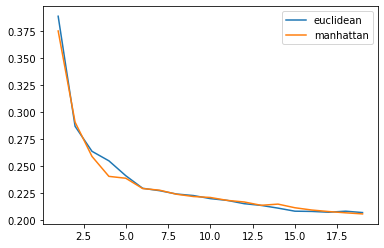

In [ ]:
# Plot elbow curve for 2 different metric.
plt.plot(k,test_error,label="euclidean")
plt.plot(k,manhattan_test_error,label="manhattan")
plt.legend()
plt.show()

**IMPORTANT COMMENTS ON ELBOW CURVE** <br>
<br>
According to Elbow Curves, both of the metrics has similar and close curves. <br>
<br>
The optimal k seems on the euclidean metric elbow curve. <br>
<br>
It takes the biggest slope change at 7. <br>
<br>
As a result our choosed parameters n_neighbors = 7, metric = euclidean. <br>
<br>
<br>
<br>

In [ ]:
# Create kNN Model with updated parameters.
updated_knn = KNN(n_neighbors = 7, metric = "euclidean")
updated_knn.fit(x_train,y_train)
updated_knn_prediction = updated_knn.predict(x_test)
updated_knn_accuracy = accuracy_score(y_test, np.round(abs(updated_knn_prediction))) 
print("kNN Model Accuracy After Parameter Selection:", updated_knn_accuracy)

kNN Model Accuracy After Parameter Selection: 0.6797608881298036


**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
Parameter selection affects the kNN Model accuracy positively. <br>
<br>
Hyperparameterized model is better than default. <br>
<br>
According to accuracy kNN Regressor has ~0.68 <br>
<br>
<br>
<br>

In [ ]:
# Create Logistic Regression pre-model before parameter selection.
base_model = LogisticRegression()
base_model.fit(x_train, y_train)
base_prediction = base_model.predict(x_test)
base_accuracy = accuracy_score(y_test, base_prediction)
print("Logistic Regression Model Accuracy Before Parameter Selection:", base_accuracy)

Logistic Regression Model Accuracy Before Parameter Selection: 0.7421007685738685


**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
We need to base model for the investigate of parameter selection over model so we use base model with default parameters. <br>
<br>
<br>
<br>

In [ ]:
# Grid Search for Logistic Regression.
lg = LogisticRegression(random_state = 1)
parameters = {
            'penalty':['l2'],
            'C':[1,10,100],
            'max_iter': range(26),
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
        }
GS = GridSearchCV(lg, parameters, cv=10)
GS.fit(x_train, y_train)
print('Best parameters according to Grid Search:', GS.best_params_)
print('Best score according to Grid Search:', GS.best_score_)

Best parameters according to Grid Search: {'C': 1, 'max_iter': 2, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score according to Grid Search: 0.7123120042936371


**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
According to Grid Search parameter selection: <br>
    - solver = lbfgs <br>
    - max_iter = 2 <br>
    - C = 1 <br> 
    - penalty = l2 <br>
    will give the best accuracy <br>
<br>
<br>
<br>

In [ ]:
# Create updated model according to Grid Search parameters
GS_model = LogisticRegression(C = 1, solver = 'lbfgs', max_iter = 2, penalty = 'l2')  
GS_model.fit(x_train, y_train) 
GS_prediction = GS_model.predict(x_test)
GS_accuracy = accuracy_score(y_test, GS_prediction)
print("Accuracy after Grid Search parameter selection:", GS_accuracy)

Accuracy after Grid Search parameter selection: 0.7241673783091375


**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
According to accuracy score, the default parameters are more successful than cross validation parameters. <br>
<br>
This result shows us sometimes Grid Search optimal parameters can fail. <br>
<br>
This situation is possible for all models. Because while parameter selection we can't try all ranges of parameters. Because of this reason, sometimes we try all worst parameters and find best from the worsts. <br>
<br>
The Logistic Regression Model still better with bad parameters than kNN best model. <br>
<br>
This result shows default parameterized model works better than Grid Search hyperparameterized model. <br>
<br>
<br>
<br>

In [ ]:
# Choose parameter over validation set manually.
parameter_dict = {}
solver_parameters = ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga']   # Solver parameters list.

for s in solver_parameters:
    iter_error = []
    for i in range(20):
        # Create the Logistic Regression model with solver s.
        lr_clf = LogisticRegression(solver = s, max_iter = i)  
        # Fit the model with train data.
        lr_clf.fit(x_train, y_train)   
        # Make prediction with validation set.
        prediction = lr_clf.predict(x_valid)  
        # Calculate error over prediction and validation set.
        error = 1 - f1_score(prediction, y_valid)
        # Append errors to list
        iter_error.append(error)
    # Create solver - max_iter pairs.
    parameter_dict[s] = iter_error

# Choose best solver - max_iter pair.
print("solver: newton-cg", "\tmax_iter:", parameter_dict.get('newton-cg').index(min(parameter_dict.get('newton-cg'))) + 1, "\terror:", min(parameter_dict.get('newton-cg')))
print("solver: liblinear", "\tmax_iter:", parameter_dict.get('liblinear').index(min(parameter_dict.get('liblinear'))) + 1, "\terror:", min(parameter_dict.get('liblinear')))
print("solver: lbfgs", "\t\tmax_iter:", parameter_dict.get('lbfgs').index(min(parameter_dict.get('lbfgs'))) + 1, "\terror:", min(parameter_dict.get('lbfgs')))
print("solver: sag", "\t\tmax_iter:", parameter_dict.get('sag').index(min(parameter_dict.get('sag'))) + 1, "\terror:", min(parameter_dict.get('sag')))
print("solver: saga", "\t\tmax_iter:", parameter_dict.get('saga').index(min(parameter_dict.get('saga'))) + 1, "\terror:", min(parameter_dict.get('saga')))

solver: newton-cg 	max_iter: 16 	error: 0.2715231788079471
solver: liblinear 	max_iter: 14 	error: 0.27574750830564787
solver: lbfgs 		max_iter: 19 	error: 0.28595600676818944
solver: sag 		max_iter: 8 	error: 0.29391891891891897
solver: saga 		max_iter: 4 	error: 0.2915254237288136


**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
According to manual choosed parameters: <br>
    - solver = newton-cg <br>
    - max_iter = 16 <br>
    - C = 1.0 (default) <br>
will give the best accuracy. <br>
<br>
<br>
<br>

In [ ]:
# Create updated model with manually choosed parameters.
updated_model = LogisticRegression(solver = 'newton-cg', max_iter = 16)  
updated_model.fit(x_train, y_train) 
updated_prediction = updated_model.predict(x_test)
updated_accuracy = accuracy_score(y_test, updated_prediction)
print("Accuracy after manually parameter selection:", updated_accuracy)

Accuracy after manually parameter selection: 0.7446626814688301


**IMPORTANT COMMENTS ON OUTPUT** <br>
<br>
Accuracy of the Logistic Regression model increased. <br>
<br>
According to accuracy difference, Logistic Regression model is better than kNN model. <br>
<br>
Manual choosed parameters are better than Grid Search for this problem. <br>
<br>
Logistic Regression model is suitable for this problem. <br>
<br>
That evaluation says %74.5 of the predictions are true. <br>
<br>
<br>
<br>

# MODEL EVALUATION AND VISUALIZATIONS

In [ ]:
# Display the predictors effect degree.
affect_coefs = pd.DataFrame()
affect_coefs['Features'] = x.columns
affect_coefs['Coefficients'] = updated_model.coef_.reshape(14, 1)
affect_coefs.sort_values(by = 'Coefficients', ascending = False)

,Features,Coefficients
6,blueDragonDiff,0.175453
5,blueEliteMonsterDiff,0.120778
2,blueFirstBlood,0.056400
9,blueAvgLevelDiff,0.014848
1,blueDestroyedWardDiff,0.010822
0,bluePlacedWardDiff,0.000591
12,blueGoldDiff,0.000525
13,blueExperienceDiff,0.000244
11,blueJungleMinionDiff,-0.003705
10,blueMinionsDiff,-0.006098


**IMPORTANT COMMENTS ON PREDICTOR EFFECTS** <br>
<br>
This DataFrame show the affect of each predictor while predicting. <br>
<br>
Coefficients sorted in descending order. <br>
<br>
According to this DataFrame, Dragon diff and Elite Monster diff affect the win more than others. <br>
<br>
According to this DataFrame, Destroyed turret and Herald diff negatively affect the win. <br>
<br>
Most of the choosed predictors positively affect the prediction. <br>
<br>
<br>
<br>

In [ ]:
# Display the first 30 tuples of predicted values vs actual values.
test_df = pd.DataFrame((np.array(y_test)),columns= y.columns)
x_test_df=pd.DataFrame(np.array(x_test),columns= x.columns)
concanted=pd.concat([test_df,x_test_df],axis=1)
predicted_df = pd.DataFrame({'predicted_value': updated_prediction})
concanted=pd.concat([predicted_df,concanted],axis=1)
concanted[['predicted_value', 'blueWins']].head(30)

,predicted_value,blueWins
0,0,0
1,0,1
2,0,0
3,0,0
4,1,1
5,0,1
6,1,1
7,0,1
8,0,1
9,0,0


**IMPORTANT COMMENTS ON PREDICTON DATAFRAME** <br>
<br>
According to first 30 tuples, the 22 of 30 predicted true. <br>
<br>
Most of the actual values predicted as true. <br>
<br>
Accuracy rate of the sample is ~0.74. <br>
<br>
Error rate of the sample is ~0.27 <br>
<br>
<br>
<br>

In [ ]:
# Print report of the regression results.
report = classification_report(y_test, updated_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       578
           1       0.75      0.75      0.75       593

    accuracy                           0.74      1171
   macro avg       0.74      0.74      0.74      1171
weighted avg       0.74      0.74      0.74      1171



**IMPORTANT COMMENTS ON CLASSIFICATIN REPORT** <br>
<br>
Accuracy is consistent with the sample's accuracy which calculated previous step. <br>
<br>
F1-Score shows the ratio of true classified instances. It measures the harmonic mean of precision and recall. <br>
<br>
According to support column, our test set is balanced. <br>
<br>
<br>
<br>

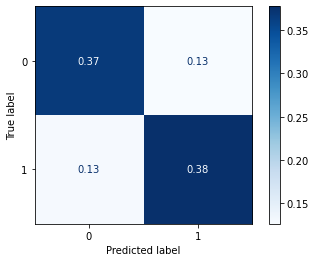

In [ ]:
# Plot confusion matrix.
matrix = confusion_matrix(y_test, updated_prediction, normalize = "all")
display_CM = ConfusionMatrixDisplay(matrix).plot(cmap = plt.cm.Blues)

**IMPORTANT COMMENTS ON CONFUSION MATRIX** <br>
<br>
Confusion matrix is a performance measure of model classification performance. <br>
<br>
It is extremely useful for measuring Accuracy, Error Rate, Precision, Recall, and most importantly AUC-ROC curves. <br>
<br>
True label shows the test values and predict label shows the predicted values. <br>
<br>
Our Model Accuracy calculated as ~0.75, this is too close to the sample's accuracy which calculated two steps before.<br>
<br>
Our Model Error Rate calculated as ~0.26, this is too close to the sample's error which calculated two steps before. <br>
<br>
According to Confusion Matrix vs Sample's Accuracy and Error Rate calculations, we can say our model is consistent. <br>
<br>
Our Model Precision calculated as ~0.75. <br>
<br>
Our Model Recall calculated as ~0.75.<br>
<br>
<br>
<br>

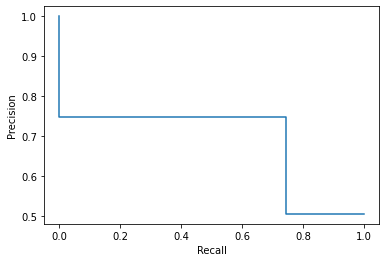

In [ ]:
# Plot Precision-Recall Curve of the model.
precision, recall, _ = precision_recall_curve(y_test, np.round(abs(updated_prediction)))
display_PR = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_curve = display_PR.plot()

**IMPORTANT COMMENTS ON PR CURVE** <br>
<br>
PR Curve use for binary classification algorithms. <br>
<br>
Our predictors are imbalanced, so we need to use PR Curve for evaluate the model. <br>
<br>
The successfulity of the PR Curve determine with closity to ideal and area under the curve. If area under the curve is bigger and the curve close to ideal, it can qualified as successful. <br>
<br>
Area under the curve is approximetaly 0.70, so it is bigger than area under baseline classifier's curve(~0.5). <br>
<br>
Our model curve is between the baseline (y = 0.5) and perfect classifier. So we can evaluate the model as good. <br>
<br>
The model is close to ideal. <br>
<br>
Area under the curve is big and the curve is close to ideal, so we can say our model is successful. <br>
<br>
<br>
<br>

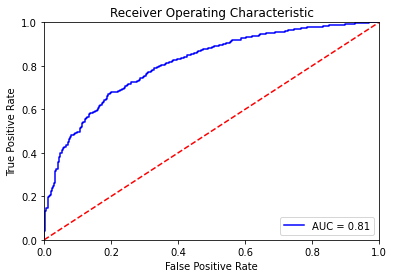

In [ ]:
# Calculate TPR and FPR for plot ROC Curve
probs = lr_clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**IMPORTANT COMMENTS ON ROC CURVE** <br>
<br>
ROC Curve shows trade-off between sensitivity (TPR) and specifity (1-FPR). <br>
<br>
Red dashed lines shows the random estimator, which AUC (Area Under Curve) is ~0.5. <br>
<br>
If model curve was under the random estimator, it qualified as random estimator. <br>
<br>
Our model curve has 0.81 AUC, so the area under the curve of our model is bigger than random estimator. It can't qualified as random estimator. <br>
<br>
Model is close to the ideal (1,1). <br>  
According to ROC Curve categorization, our model evaluate as good. <br>